<a href="https://colab.research.google.com/github/siddharthchd/introml/blob/master/unit8/mnist_svm_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
(Xtr, ytr), (Xts, yts) = tf.keras.datasets.mnist.load_data()

print('Xtr.shape : {}'.format(Xtr.shape))
print('Xts.shape : {}'.format(Xts.shape))

ntr = Xtr.shape[0]
nts = Xts.shape[0]
nrow = Xtr.shape[1]
ncol = Xts.shape[2]

11493376/11490434 [==============================] - 0s 0us/step
Xtr.shape : (60000, 28, 28)
Xts.shape : (10000, 28, 28)


In [4]:
npix = nrow * ncol
Xtr = 2 * (Xtr / 255 - 0.5)
Xtr = Xtr.reshape((ntr, npix))

Xts = 2 * (Xts / 255 - 0.5)
Xts = Xts.reshape((nts, npix))

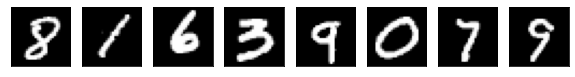

In [6]:
def plt_digit(ax, x):
    
    nrow = 28
    ncol = 28
    xsq = x.reshape((nrow, ncol))
    ax.imshow(xsq, cmap = 'Greys_r')
    ax.set_xticks([])
    ax.set_yticks([])

# Select random digits
nplt = 8
Iperm = np.random.permutation(ntr)

# Plot the images using the subplot command
fig, ax = plt.subplots(1, nplt, figsize = (10, 3))
for i in range(nplt):

    ind = Iperm[i]
    plt_digit(ax[i], Xtr[ind, :])

### Trying a Logistic Regression Classifier

In [7]:
ntr1 = 5000
Xtr1 = Xtr[Iperm[: ntr1], :]
ytr1 = ytr[Iperm[: ntr1]]

In [8]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(verbose = 10, solver = 'lbfgs', max_iter = 500)
logreg.fit(Xtr1, ytr1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=10,
                   warm_start=False)

In [10]:
import pickle

with open("mnist_logreg.p", "wb") as fp:
    pickle.dump([logreg, Xtr1, ytr1, Iperm], fp)

In [12]:
with open("mnist_logreg.p", "rb") as fp:
    logreg, Xtr1, ytr1, Iperm = pickle.load(fp)

In [14]:
nts1 = 5000
Iperm_ts = np.random.permutation(nts)
Xts1 = Xts[Iperm_ts[:nts1], :]
yts1 = yts[Iperm_ts[:nts1]]
yhat = logreg.predict(Xts1)
acc = np.mean(yhat == yts1)
print('Accuracy = {0:f}'.format(acc))

Accuracy = 0.891600


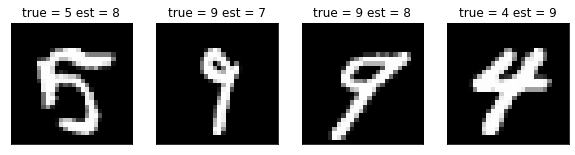

In [15]:
nplt = 4
Ierr = np.where(yts1 != yhat)[0]

fig, ax = plt.subplots(1, nplt, figsize = (10, 4))
for i in range(nplt):

    ind = Ierr[i]
    plt_digit(ax[i], Xts1[ind, :])
    title = 'true = {0:d} est = {1:d}'.format(yts1[ind].astype(int), yhat[ind].astype(int))
    ax[i].set_title(title)

[[0.962 0.    0.008 0.    0.002 0.017 0.008 0.002 0.    0.   ]
 [0.    0.973 0.004 0.002 0.    0.004 0.004 0.    0.016 0.   ]
 [0.011 0.014 0.862 0.012 0.006 0.01  0.019 0.015 0.051 0.004]
 [0.006 0.002 0.025 0.871 0.002 0.038 0.004 0.009 0.026 0.014]
 [0.    0.004 0.017 0.008 0.895 0.    0.015 0.004 0.01  0.043]
 [0.019 0.    0.006 0.057 0.016 0.826 0.017 0.011 0.031 0.012]
 [0.021 0.002 0.021 0.    0.019 0.019 0.909 0.002 0.004 0.   ]
 [0.004 0.011 0.033 0.016 0.014 0.    0.    0.888 0.004 0.033]
 [0.017 0.016 0.016 0.025 0.012 0.029 0.015 0.008 0.839 0.022]
 [0.008 0.007 0.004 0.01  0.041 0.01  0.    0.023 0.016 0.882]]


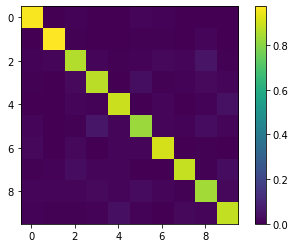

In [18]:
from sklearn.metrics import confusion_matrix

C = confusion_matrix(yts1, yhat)

# Normalize the confusion matrix
Csum = np.sum(C, 1)
C = C / Csum[None, :]

# Print the confusion matrix
print(np.array_str(C, precision = 3, suppress_small = True))
plt.imshow(C, interpolation = 'none')

plt.colorbar()

### Visualizing the weights

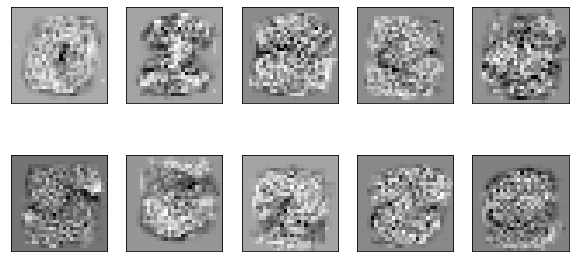

In [19]:
W = logreg.coef_
ndigit = W.shape[0]
fig, ax = plt.subplots(2, 5, figsize = (10, 5))
for i in range(ndigit):

    irow = i // 5
    icol = i % 5
    plt_digit(ax[irow, icol], W[i, :])

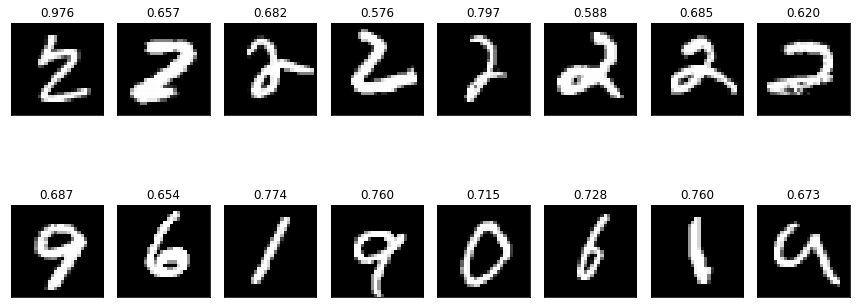

In [23]:
# Find digits with 2 and digits which are not true
idig = 2
Idig = np.where(ytr == idig)[0]
Inodig = np.where(ytr != idig)[0]
n = len(Idig)
Idig = Idig[np.random.permutation(n)]
n = len(Inodig)
Inodig = Inodig[np.random.permutation(n)]

# Set the weight to the first digit
w = Xtr[Idig[0], :]
w = w / np.sum(np.abs(w))

# Find the correlation coefficient with the other digits 7
nplot = 8
fig, ax = plt.subplots(2, nplot, figsize = (12, 6))
rho = np.zeros(nplot)

for i in range(nplot):

    # Get a true and false digit
    j0 = Idig[i]
    j1 = Inodig[i]
    x0 = Xtr[j0, :]
    x1 = Xtr[j1, :]

    # Compute the correlations with the two digits
    rho0 = w.dot(x0)
    rho1 = w.dot(x1)

    plt_digit(ax[0, i], x0)
    ax[0, i].set_title('%5.3f' % rho0)
    plt_digit(ax[1, i], x1)
    ax[1, i].set_title('%5.3f' % rho1)

plt.tight_layout()

### Running SVM Classifier with linear kernel

In [24]:
from sklearn import svm

svc = svm.SVC(probability = False, kernel = 'linear', C = 2.8, gamma = .0073, verbose = 10)

In [26]:
ntr1 = 5000
nts1 = 5000
Xtr1 = Xtr[Iperm[:ntr1], :]
ytr1 = ytr[Iperm[:ntr1]]
Xts1 = Xts[Iperm_ts[:nts1], :]
yts1 = yts[Iperm_ts[:nts1]]

In [27]:
svc.fit(Xtr, ytr)

[LibSVM]

SVC(C=2.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0073, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=10)

In [28]:
import pickle

with open('mnist_svc.p', 'wb') as fp:
    pickle.dump([svc, Xtr1, ytr1], fp)

In [29]:
yhat_ts = svc.predict(Xts1)

In [30]:
acc = np.mean(yhat_ts == yts1)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.928600


### Looking at support vectors

In [31]:
S = svc.support_vectors_
S.shape

(10124, 784)

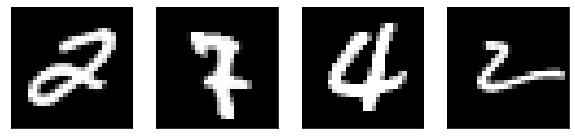

In [33]:
nplt = 4
nsv = S.shape[0]
Iperms = np.random.permutation(nsv)
fig, ax = plt.subplots(1, nplt, figsize = (10, 4))
for i in range(nplt):

    ind = Iperms[i]
    plt_digit(ax[i], S[ind, :])

### SVM using RBP kernel

In [34]:
svcrbf = svm.SVC(probability = False, kernel = 'rbf', C = 2.8, gamma = 0.0073, verbose = 10)

In [36]:
svcrbf.fit(Xtr1, ytr1)

[LibSVM]

SVC(C=2.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0073, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=10)

In [37]:
yhat_ts = svcrbf.predict(Xts1)
acc = np.mean(yhat_ts == yts1)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.961400


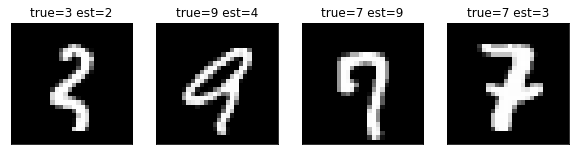

In [38]:
Ierr = np.where((yhat_ts != yts1))[0]
nplt = 4
fig, ax = plt.subplots(1,nplt,figsize=(10, 4))
for i in range(nplt):             
    ind = Ierr[i]    
    plt_digit(ax[i], Xts1[ind,:])        
    title = 'true={0:d} est={1:d}'.format(yts1[ind].astype(int), yhat_ts[ind].astype(int))
    ax[i].set_title(title)

### Support Vectors

In [39]:
S = svcrbf.support_vectors_
S.shape

(2965, 784)

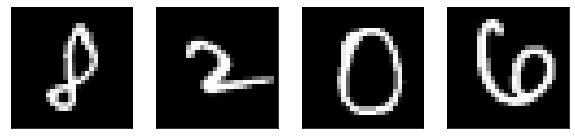

In [40]:
nplt = 4
nsv = S.shape[0]
Iperms = np.random.permutation(nsv)
fig, ax = plt.subplots(1,nplt,figsize=(10, 4))
for i in range(nplt):        
    ind = Iperms[i]
    plt_digit(ax[i], S[ind,:])